In [ ]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
FOLDS =10
%matplotlib inline


In [ ]:
def cont_age(field):
  plt.figure()
  g = None
  if field == "Age":
    df_query_mri = df[df["Age"] > 0]
    g = sns.countplot(df_query_mri["Age"])
    g.figure.set_size_inches(18.5, 10.5)
  else:
    g = sns.countplot(df[field])
    g.figure.set_size_inches(18.5, 10.5)
sns.despine()


<Figure size 640x480 with 0 Axes>

In [ ]:
def cont_Dementes(field):
  plt.figure()
  g = None
  if field == "Group":
    df_query_mri = df[df["Group"] >= 0]
    g = sns.countplot(df_query_mri["Group"])
    g.figure.set_size_inches(18.5, 10.5)
  else:
    g = sns.countplot(df[field])
    g.figure.set_size_inches(18.5, 10.5)
sns.despine()


<Figure size 640x480 with 0 Axes>

In [ ]:
def bar_chart(feature):
  Demented = df[df['Group']==1][feature].value_counts()
  Nondemented = df[df['Group']==0][feature].value_counts()
  df_bar = pd.DataFrame([Demented,Nondemented])
  df_bar.index = ['Demented','Nondemented']
  df_bar.plot(kind='bar',stacked=True, figsize=(8,5))


In [ ]:
def report_performance(model):
  model_test = model.predict(X_test)
  print("Confusion Matrix")
  print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
  print("")
  print("Classification Report")
  print(metrics.classification_report(y_test, model_test))

In [ ]:
data = '/content/oasis_longitudinal.csv'
df = pd.read_csv (data)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.describe()


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
nd = pd.DataFrame(df['Group']=='Nondemented')
nd["Group"].value_counts()

,count
Group,
True,190
False,183


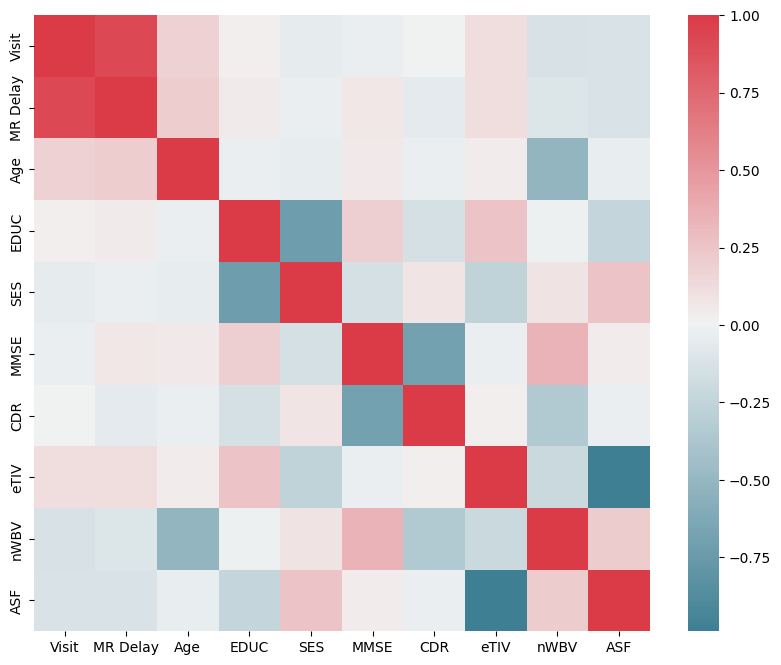

In [ ]:
# Dropping non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix only from the numeric columns
corr = numeric_df.corr(method='pearson')

# Plotting the heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)
plt.show()


In [ ]:
numeric_df.corr(method='pearson')

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.029078,0.065844,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


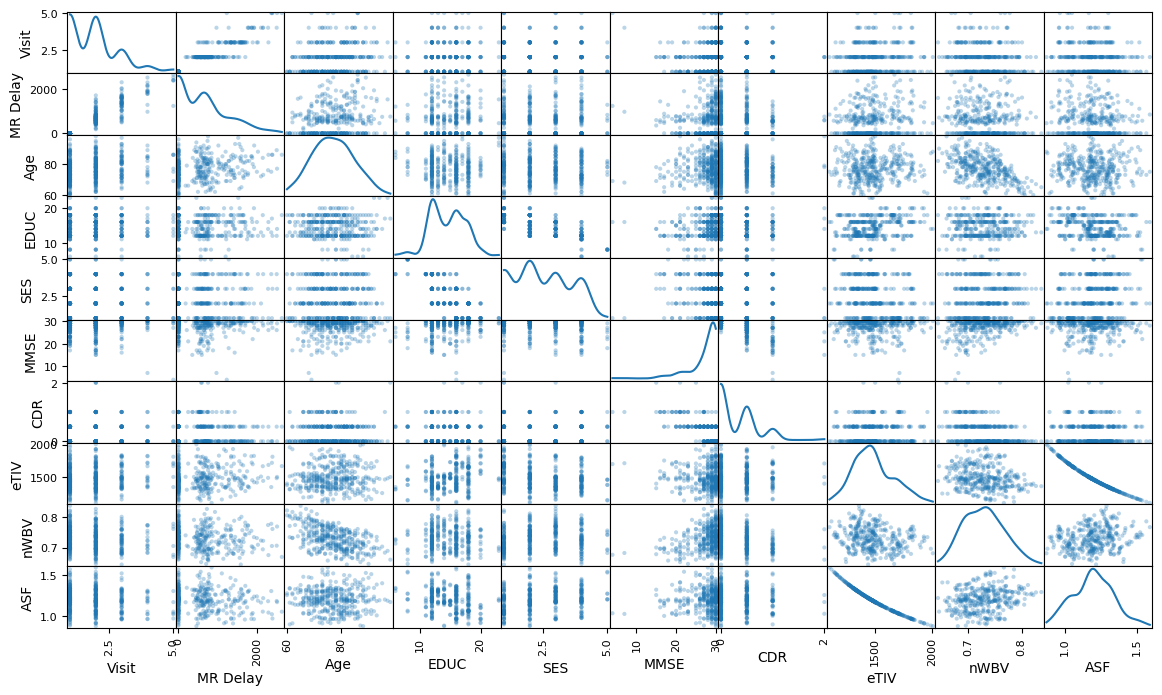

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


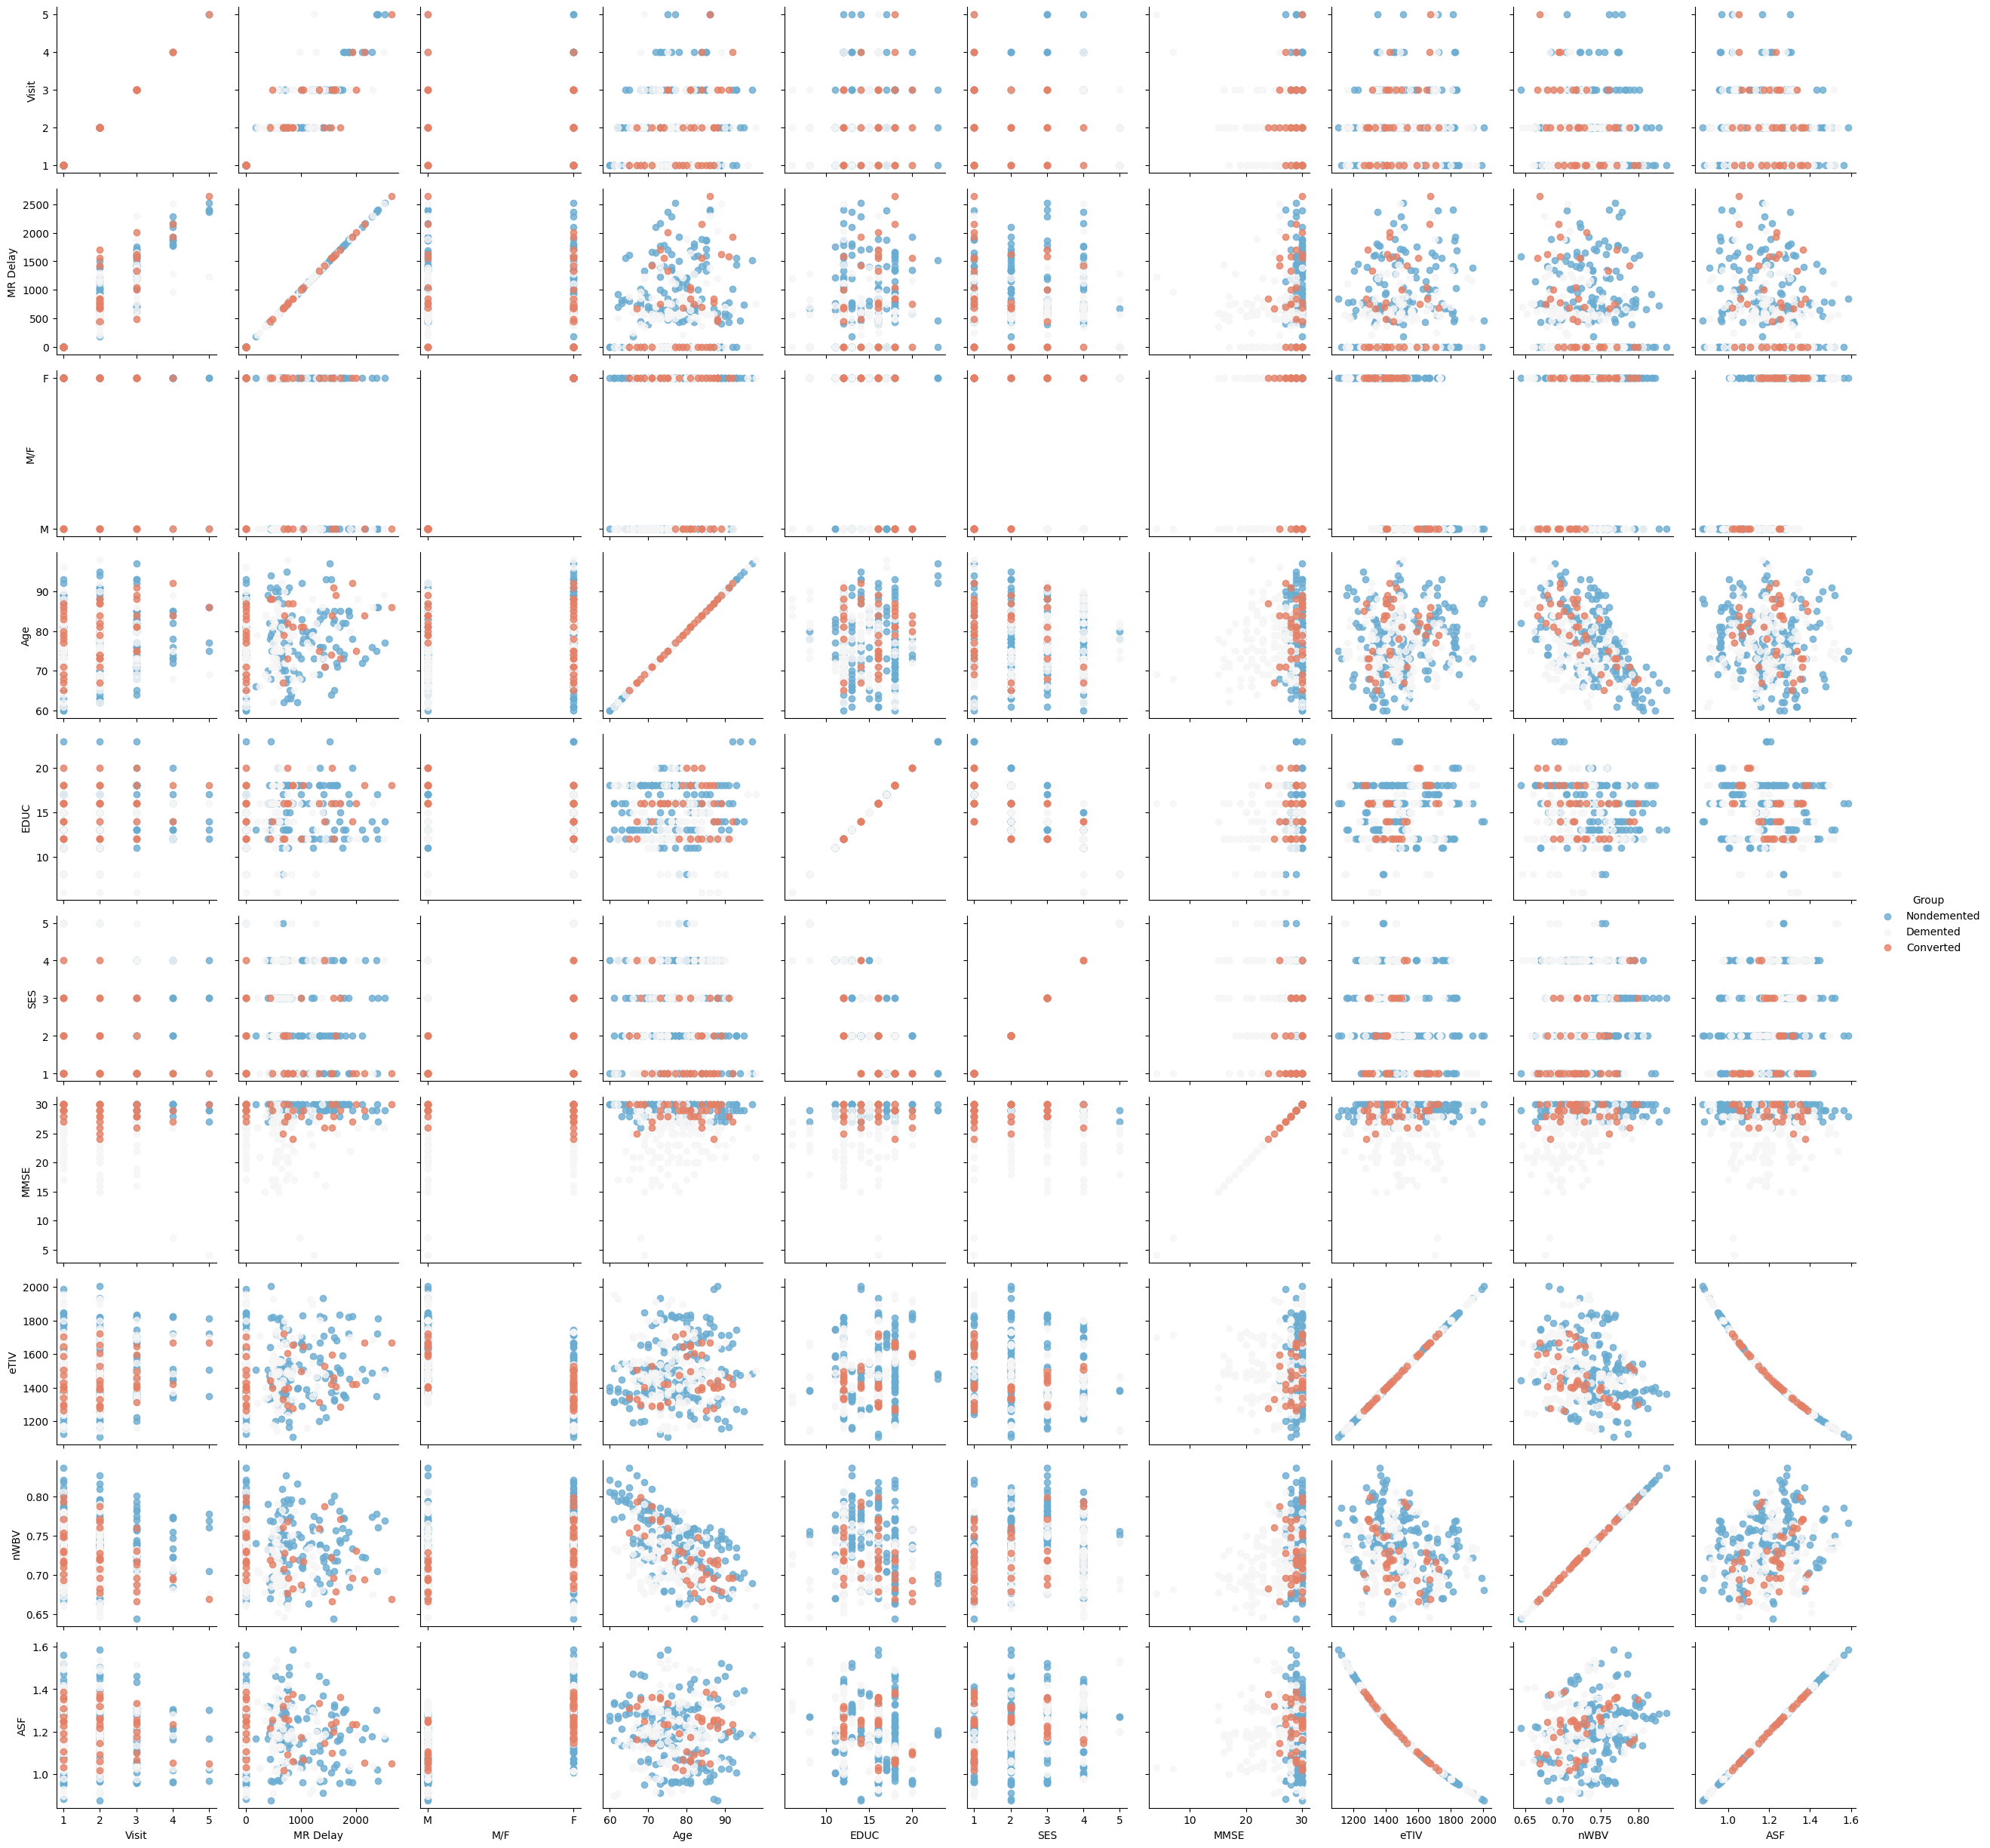

In [ ]:
g = sns.PairGrid(df, vars=['Visit','MR Delay','M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'],hue='Group', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
df.rename(columns={'M/F': 'Gender'}, inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



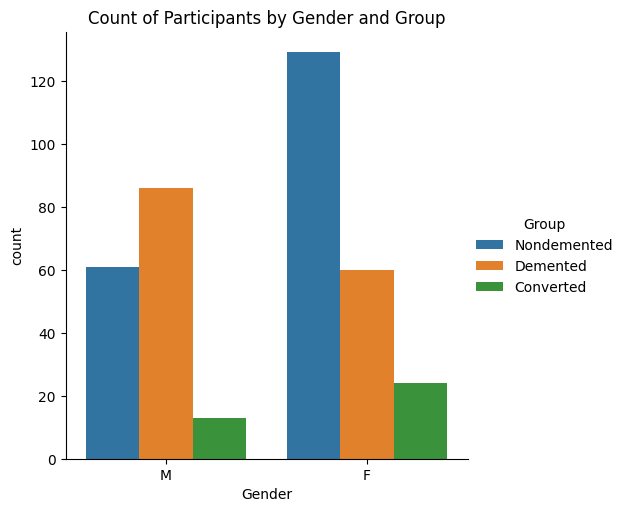

In [ ]:
sb.catplot(x='Gender', data=df, hue='Group', kind='count')
plt.title('Count of Participants by Gender and Group')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




(12.5, 30.0)

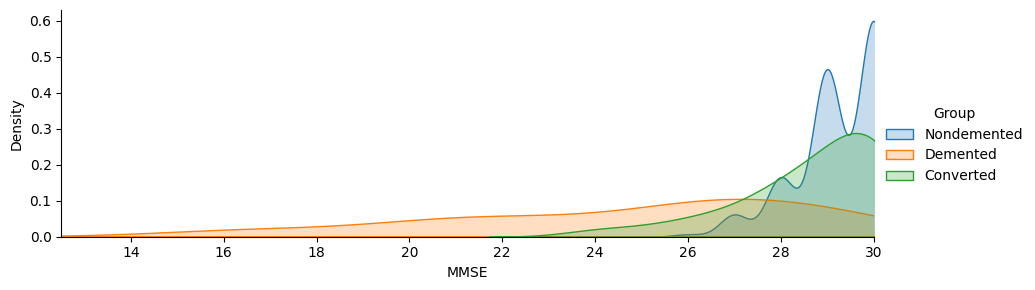

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(12.5)

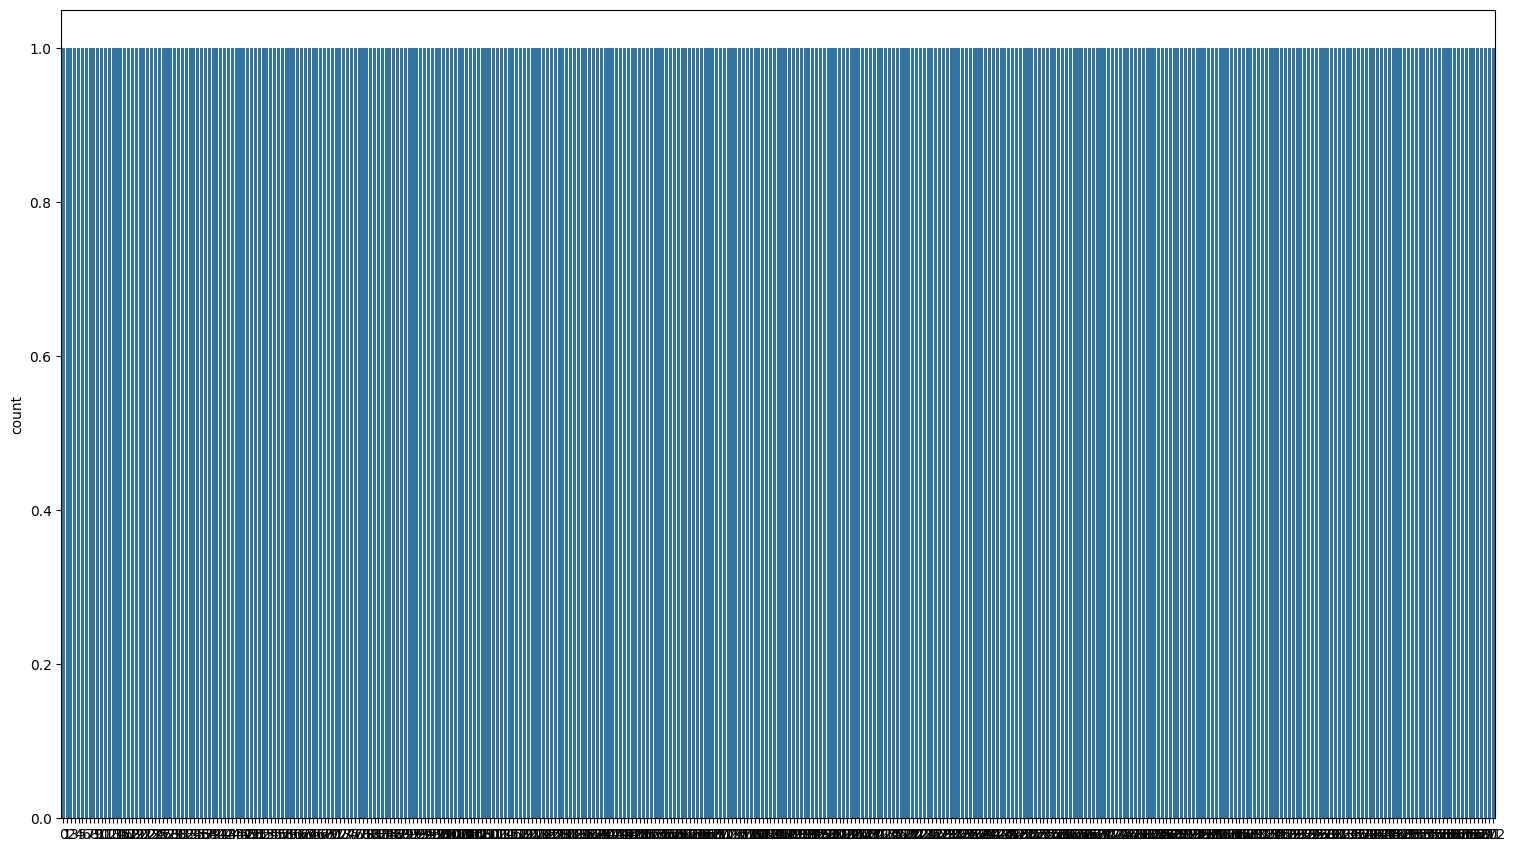

In [ ]:
cont_age("Age")

In [ ]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df.head(3)


,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046


In [ ]:
df.drop(['Subject ID'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['MRI ID'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['Visit'], axis = 1, inplace = True, errors = 'ignore')
#for this study the CDR we eliminated it
df.drop(['CDR'], axis = 1, inplace = True, errors = 'ignore')
df.head(3)


,Group,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,0,M,R,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,457,M,R,88,14,2.0,30.0,2004,0.681,0.876
2,Demented,0,M,R,75,12,NaN,23.0,1678,0.736,1.046


In [ ]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])
df.head(3)

<ipython-input-24-4748c9780318>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Group,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,0,M,R,87,14,2.0,27.0,1987,0.696,0.883
1,0,457,M,R,88,14,2.0,30.0,2004,0.681,0.876
2,1,0,M,R,75,12,NaN,23.0,1678,0.736,1.046


In [ ]:
# Replace 'M' and 'F' with 1 and 0 in the 'Gender' column
df['Gender'] = df['Gender'].replace(['M', 'F'], [1, 0])

# Show the first 3 rows of the DataFrame
df.head(3)

<ipython-input-26-99074578bf02>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Group,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,0,1,R,87,14,2.0,27.0,1987,0.696,0.883
1,0,457,1,R,88,14,2.0,30.0,2004,0.681,0.876
2,1,0,1,R,75,12,NaN,23.0,1678,0.736,1.046


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample DataFrame for demonstration
# df = pd.DataFrame({'Hand': ['left', 'right', 'left', 'right']})

# Initialize the label encoder
encoder = LabelEncoder()

# Fit the encoder to the 'Hand' column
encoder.fit(df['Hand'].values)

# Transform the 'Hand' column and assign back to the same column
df['Hand'] = encoder.transform(df['Hand'].values)

# If needed, you can create another encoder (though it's not necessary after this)
encoder2 = LabelEncoder()
encoder2.fit(df['Hand'].values)
print(list(encoder2.classes_))


[0]


In [ ]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Lost proportion (%)' :round(data_na,2)})
missing_data.head(20)


,Lost proportion (%)
SES,5.09
MMSE,0.54


In [ ]:
from sklearn.impute import SimpleImputer
# We perform it with the most frequent value
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')
imputer.fit(df[['SES']])
df[['SES']] = imputer.fit_transform(df[['SES']])
# We perform it with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')
imputer.fit(df[['MMSE']])
df[['MMSE']] = imputer.fit_transform(df[['MMSE']])
from sklearn.impute import SimpleImputer
# We perform it with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')
imputer.fit(df[['MMSE']])
df[['MMSE']] = imputer.fit_transform(df[['MMSE']])


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a copy of the original DataFrame (optional)
df_norm = df.copy()

# Initialize the scaler
scaler = StandardScaler()

# Columns to standardize
columns_to_standardize = ['Age', 'MR Delay', 'M/F', 'Hand', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

# Convert categorical columns to numeric if necessary
if 'M/F' in df.columns:
    df['M/F'] = df['M/F'].map({'M': 1, 'F': 0})  # Example mapping for Male/Female
if 'Hand' in df.columns:
    df['Hand'] = df['Hand'].map({'R': 1, 'L': 0})  # Example mapping for Right/Left handedness

# Ensure all columns are numeric and exist in df
# It's also good to check if these columns exist in the DataFrame
columns_to_standardize = [col for col in columns_to_standardize if col in df.columns]

# Standardize the selected columns
df_norm[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Print the normalized DataFrame
print(df_norm.head(3))


   Group  MR Delay  Gender  Hand       Age      EDUC       SES      MMSE  \
0      0 -0.937715       1   NaN  1.308738 -0.208132 -0.394466 -0.095686   
1      0 -0.217613       1   NaN  1.439787 -0.208132 -0.394466  0.721664   
2      1 -0.937715       1   NaN -0.263856 -0.904394 -0.394466 -1.185486   

       eTIV      nWBV       ASF  
0  2.836059 -0.905169 -2.265742  
1  2.932703 -1.309643 -2.316501  
2  1.079409  0.173429 -1.083784  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning:

invalid value encountered in divide



In [ ]:
df_norm.to_csv('DatasetSelectionAttributes.csv', sep=',',index=False)

In [ ]:
df.drop(['Hand'], axis = 1, inplace = True, errors = 'ignore')
df.drop(['MR Delay'], axis = 1, inplace = True, errors = 'ignore')
df.head()

,Group,Gender,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,1987,0.696,0.883
1,0,1,88,14,2.0,30.0,2004,0.681,0.876
2,1,1,75,12,2.0,23.0,1678,0.736,1.046
3,1,1,76,12,2.0,28.0,1738,0.713,1.010
4,1,1,80,12,2.0,22.0,1698,0.701,1.034


In [ ]:
data_test = df

In [ ]:
X = data_test.drop(["Group"],axis=1)
y = data_test["Group"].values
X.head(3)

,Gender,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,1,87,14,2.0,27.0,1987,0.696,0.883
1,1,88,14,2.0,30.0,2004,0.681,0.876
2,1,75,12,2.0,23.0,1678,0.736,1.046


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [ ]:
print("{0:0.2f}% Train".format((len(X_train)/len(data_test.index)) * 100))
print("{0:0.2f}% Test".format((len(X_test)/len(data_test.index)) * 100))

74.80% Train
25.20% Test


In [ ]:
print("Original Demented : {0} ({1:0.2f}%)".format(len(df_norm.loc[df_norm['Group'] == 1]), 100 * (len(df_norm.loc[df_norm['Group'] == 1]) / len(df_norm))))
print("Original Nondemented : {0} ({1:0.2f}%)".format(len(df_norm.loc[df_norm['Group'] == 0]), 100 * (len(df_norm.loc[df_norm['Group'] == 0]) / len(df_norm))))
print("")

print("Training Demented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Training Nondemented : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))
print("")

print("Test Demented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Test Nondemented : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Original Demented : 183 (49.06%)
Original Nondemented : 190 (50.94%)

Training Demented : 139 (49.82%)
Training Nondemented : 140 (50.18%)

Test Demented : 44 (46.81%)
Test Nondemented : 50 (53.19%)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Reduced parameter grid
n_estimators = list(range(50, 150, 10))  # fewer trees
max_features = ['sqrt']  # use only sqrt
max_depth = list(range(10, 30, 5))  # fewer depths
min_samples_split = [2, 5, 10, 15]  # fewer options

# Create the random grid
parameter_rf = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

model_forest = RandomForestClassifier(n_jobs=-1)

# Create RandomizedSearchCV object with fewer iterations and cv folds
forest_random = RandomizedSearchCV(
    estimator=model_forest,
    param_distributions=parameter_rf,
    n_iter=20,  # reduced iterations
    cv=5,  # reduced folds
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_absolute_error'
)

# Fit the model
forest_random.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25],
                                        'max_features': ['sqrt'],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
forest_random.best_params_

{'n_estimators': 130,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
model_rf = forest_random.best_estimator_
model_rf = RandomForestClassifier(n_estimators=60,min_samples_split=8,max_features='sqrt',max_depth= 37)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=37, min_samples_split=8, n_estimators=60)

In [ ]:
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='roc_auc').mean()
test_score


0.9001962323390895

In [ ]:
test_score = cross_val_score(model_rf, X_train, y_train, cv=FOLDS, scoring='accuracy').mean()
test_score


0.8173280423280422

In [ ]:
Predicted_rf= model_rf.predict(X_test)
test_recall = recall_score(y_test, Predicted_rf, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, Predicted_rf, pos_label=1)
test_auc = auc(fpr, tpr)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

# Parameters
n_estimators = range(50, 280)
max_depth = range(1, 40)
min_samples_leaf = [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60]

# Create the random grid
parameter_Et = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

# Initialize model
model_et = ExtraTreesClassifier(n_jobs=-1)

# Initialize RandomizedSearchCV
et_random = RandomizedSearchCV(estimator=model_et,
                                param_distributions=parameter_Et,
                                n_iter=100,
                                cv=FOLDS,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1,
                                scoring='roc_auc')

# Fit the model
et_random.fit(X_train, y_train)

# Check for best parameters and scores
print("Best parameters found: ", et_random.best_params_)
print("Best AUC score: ", et_random.best_score_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters found:  {'n_estimators': 77, 'min_samples_leaf': 3, 'max_depth': 36}
Best AUC score:  0.9098901098901099


In [ ]:
n_estimators = range(10,200)

In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]

In [ ]:
parameters_ada = {'n_estimators': n_estimators,
'learning_rate': learning_rate}


In [ ]:
model_ada = AdaBoostClassifier()

In [ ]:
ada_random = RandomizedSearchCV(estimator = model_ada, param_distributions = parameters_ada, n_iter = 100, cv = FOLDS,
verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
ada_random.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 0.95, 1],
                                        'n_estimators': range(10, 200)},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
ada_random.best_params_


{'n_estimators': 110, 'learning_rate': 0.6}

In [ ]:
parameters_gb = {
    "loss": ["log_loss", "exponential"],  # Corrected from 'deviance' to valid options
    "learning_rate": [0.01, 0.025, 0.005, 0.5, 0.075, 0.1, 0.15, 0.2, 0.3, 0.8, 0.9],
    "min_samples_split": [2, 3, 4, 5, 10],  # Ensured valid integer values
    "min_samples_leaf": [1, 2, 3, 5, 8, 10, 15, 20, 40, 50, 55, 60, 65, 70, 80, 85, 90, 100],
    "max_depth": [3, 5, 8, 10, 15, 20, 25, 30, 40, 50],
    "max_features": ["log2", "sqrt"],
    "criterion": ["friedman_mse", "squared_error"],  # Corrected from having 'mae'
    "subsample": [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators": range(1, 100)
}


In [ ]:
model_gb= GradientBoostingClassifier()

In [ ]:
gb_random = RandomizedSearchCV(estimator = model_gb, param_distributions = parameters_gb, n_iter = 100, cv = FOLDS,
verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
gb_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.01, 0.025, 0.005,
                                                          0.5, 0.075, 0.1, 0.15,
                                                          0.2, 0.3, 0.8, 0.9],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 5, 8, 10, 15, 20, 25,
                                                      30, 40, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10,
                                                             15, 20, 40, 50, 55,
                                                             60, 65, 70, 80, 85,
                                                             90, 100],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': range(1, 100),
                                        'subsample': [0.5, 0.618, 0.8, 0.85,
                                                      0.9, 0.95, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
gb_random.best_params_

{'subsample': 0.618,
 'n_estimators': 52,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 15,
 'loss': 'exponential',
 'learning_rate': 0.3,
 'criterion': 'friedman_mse'}

In [ ]:
parameter_rf = forest_random.best_params_
parameter_et = et_random.best_params_
parameter_ada = ada_random.best_params_
parameter_gb = gb_random.best_params_

In [ ]:
model_rf = forest_random.best_estimator_
model_et = et_random.best_estimator_
model_ada = ada_random.best_estimator_
model_gb = gb_random.best_estimator_

In [ ]:
kf = KFold(n_splits=FOLDS, random_state = 0, shuffle = True)
for i, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
  Xtrain, Xval = X_train.values[train_index], X_train.values[val_index]
  ytrain, yval = y_train[train_index], y_train[val_index]
  model_rf.fit(Xtrain, ytrain)
  model_et.fit(Xtrain, ytrain)
  model_ada.fit(Xtrain, ytrain)
  model_gb.fit(Xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

In [ ]:
rf_feature = model_rf.feature_importances_
ada_feature = model_ada.feature_importances_
gb_feature = model_gb.feature_importances_
et_feature = model_et.feature_importances_


In [ ]:
cols = X.columns.tolist()
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
'Random Forest feature importances': rf_feature,
'AdaBoost feature importances': ada_feature,
'Gradient Boost feature importances': gb_feature,
'Extra Trees feature importances': et_feature,
})

In [ ]:
et_feature

array([0.12131501, 0.04393188, 0.1078174 , 0.09326805, 0.31359061,
       0.07264316, 0.15912717, 0.08830673])

In [ ]:
# Scatter plot
trace = go.Scatter(
  y = feature_dataframe['Random Forest feature importances'].values,
  x = feature_dataframe['features'].values,
  mode='markers',
  marker=dict(
    sizemode = 'diameter',
    sizeref = 1,
    size = 25,
    # size= feature_dataframe['AdaBoost feature importances'].values,
    #color = np.random.randn(500), #set color equal to a variable
    color = feature_dataframe['Random Forest feature importances'].values,
    colorscale='Portland',
    showscale=True
  ),
  text = feature_dataframe['features'].values
)
data = [trace]
layout= go.Layout(
  autosize= True,
  title= 'Random Forest Feature Importance',
  hovermode= 'closest',
    # xaxis= dict(
      # title= 'Pop',
      # ticklen= 5,
      # zeroline= False,
      # gridwidth= 2,
    # ),
  yaxis=dict(
    title= 'Feature Importance',
    ticklen= 5,
    gridwidth= 2
  ),
  showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
# Scatter plot
trace = go.Scatter(
  y = feature_dataframe['Extra Trees feature importances'].values,
  x = feature_dataframe['features'].values,
  mode='markers',
  marker=dict(
    sizemode = 'diameter',
    sizeref = 1,
    size = 25,
    # size= feature_dataframe['AdaBoost feature importances'].values,
    #color = np.random.randn(500), #set color equal to a variable
    color = feature_dataframe['Extra Trees feature importances'].values,
    colorscale='Portland',
    showscale=True
  ),
  text = feature_dataframe['features'].values
)
data = [trace]
layout= go.Layout(
  autosize= True,
  title= 'Extra Trees Feature Importance',
  hovermode= 'closest',
    # xaxis= dict(
      # title= 'Pop',
      # ticklen= 5,
      # zeroline= False,
      # gridwidth= 2,
    # ),
  yaxis=dict(
    title= 'Feature Importance',
    ticklen= 5,
    gridwidth= 2
  ),
  showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
# Scatter plot
trace = go.Scatter(
  y = feature_dataframe['AdaBoost feature importances'].values,
  x = feature_dataframe['features'].values,
  mode='markers',
  marker=dict(
    sizemode = 'diameter',
    sizeref = 1,
    size = 25,
    # size= feature_dataframe['AdaBoost feature importances'].values,
    #color = np.random.randn(500), #set color equal to a variable
    color = feature_dataframe['AdaBoost feature importances'].values,
    colorscale='Portland',
    showscale=True
  ),
  text = feature_dataframe['features'].values
)
data = [trace]
layout= go.Layout(
  autosize= True,
  title= 'AdaBoost Feature Importance',
  hovermode= 'closest',
    # xaxis= dict(
      # title= 'Pop',
      # ticklen= 5,
      # zeroline= False,
      # gridwidth= 2,
    # ),
  yaxis=dict(
    title= 'Feature Importance',
    ticklen= 5,
    gridwidth= 2
  ),
  showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')
# Scatter plot
trace = go.Scatter(
  y = feature_dataframe['Gradient Boost feature importances'].values,
  x = feature_dataframe['features'].values,
  mode='markers',
  marker=dict(
    sizemode = 'diameter',
    sizeref = 1,
    size = 25,
    # size= feature_dataframe['AdaBoost feature importances'].values,
    #color = np.random.randn(500), #set color equal to a variable
    color = feature_dataframe['Gradient Boost feature importances'].values,
    colorscale='Portland',
    showscale=True
  ),
  text = feature_dataframe['features'].values
)
data = [trace]
layout= go.Layout(
  autosize= True,
  title= 'Gradient Boosting Feature Importance',
  hovermode= 'closest',
    # xaxis= dict(
      # title= 'Pop',
      # ticklen= 5,
      # zeroline= False,
      # gridwidth= 2,
    # ),
  yaxis=dict(
    title= 'Feature Importance',
    ticklen= 5,
    gridwidth= 2
  ),
  showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')



In [ ]:
import pandas as pd

# Example DataFrame construction
data = {
    'features': ['M/F', 'Age', 'EDUC'],
    'Random Forest feature importances': [0.038654, 0.097803, 0.096879],
    'AdaBoost feature importances': [0.054545, 0.109091, 0.072727],
    'Gradient Boost feature importances': [0.037391, 0.035709, 0.103513],
    'Extra Trees feature importances': [0.074301, 0.080632, 0.120405],
    'Xgboost feature importances': [0.159253, 0.081012, 0.105536]
}

feature_dataframe = pd.DataFrame(data)

# Isolating numeric columns
numeric_cols = feature_dataframe.select_dtypes(include='number').columns

# Calculating the mean across the selected numeric columns row-wise
feature_dataframe['mean'] = feature_dataframe[numeric_cols].mean(axis=1)

# Display the first 3 rows
print(feature_dataframe.head(3))



  features  Random Forest feature importances  AdaBoost feature importances  \
0      M/F                           0.038654                      0.054545   
1      Age                           0.097803                      0.109091   
2     EDUC                           0.096879                      0.072727   

   Gradient Boost feature importances  Extra Trees feature importances  \
0                            0.037391                         0.074301   
1                            0.035709                         0.080632   
2                            0.103513                         0.120405   

   Xgboost feature importances      mean  
0                     0.159253  0.072829  
1                     0.081012  0.080849  
2                     0.105536  0.099812  
